In [1]:
import numpy as np
import xarray as xr
import xrft
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare data
### Input data
We generate a synthetic xarray dataarray.

In [2]:
N = 64
da = xr.DataArray(np.random.rand(N,N,N), 
                  dims=['t','y','x'],
                  coords={'t':range(N),'y':range(N),'x':range(N)}
                 )
da

<xarray.DataArray (t: 64, y: 64, x: 64)>
array([[[ 0.838538,  0.146604, ...,  0.875933,  0.789385],
        [ 0.349622,  0.545056, ...,  0.105519,  0.217185],
        ..., 
        [ 0.908291,  0.844869, ...,  0.996567,  0.695744],
        [ 0.692447,  0.697206, ...,  0.728242,  0.179596]],

       [[ 0.778495,  0.064382, ...,  0.392156,  0.037733],
        [ 0.512825,  0.798801, ...,  0.898834,  0.584414],
        ..., 
        [ 0.899494,  0.211977, ...,  0.476848,  0.328774],
        [ 0.731649,  0.931243, ...,  0.335878,  0.548401]],

       ..., 
       [[ 0.356647,  0.904027, ...,  0.078317,  0.562104],
        [ 0.590365,  0.717225, ...,  0.242174,  0.623704],
        ..., 
        [ 0.46673 ,  0.123202, ...,  0.861932,  0.953624],
        [ 0.784119,  0.492125, ...,  0.237214,  0.98343 ]],

       [[ 0.945108,  0.254692, ...,  0.514705,  0.00387 ],
        [ 0.391316,  0.047272, ...,  0.397938,  0.800711],
        ..., 
        [ 0.309341,  0.722667, ...,  0.741467,  0.473017],

# Perform the power spectrum
We remove the `x-y` mean before calculating the power spectrum over the `x-y` axes.

In [3]:
ps = xrft.power_spectrum(da.chunk({'t':1}), dim=['x','y'], detrend='constant', window=True)
ps

/Users/uchidatakaya/Documents/Python/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


<xarray.DataArray 'rechunk-merge-69d35b1a7ac53e39ec78d56a11758d16' (t: 64, freq_y: 64, freq_x: 64)>
dask.array<shape=(64, 64, 64), dtype=float64, chunksize=(1, 64, 64)>
Coordinates:
  * t               (t) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * freq_y          (freq_y) float64 -0.5 -0.4844 -0.4688 -0.4531 -0.4375 ...
  * freq_x          (freq_x) float64 -0.5 -0.4844 -0.4688 -0.4531 -0.4375 ...
    freq_x_spacing  float64 0.01562
    freq_y_spacing  float64 0.01562

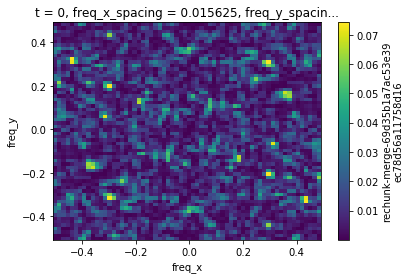

In [4]:
ps[0].plot()

# Perform the cross spectrum
We generate the second data array and take the cross spectrum between the two.

/Users/uchidatakaya/Documents/Python/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/Users/uchidatakaya/Documents/Python/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


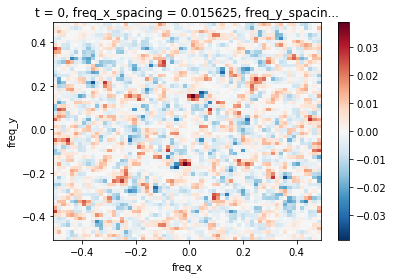

In [5]:
da2 = xr.DataArray(np.random.rand(N,N,N), 
                  dims=['t','y','x'],
                  coords={'t':range(N),'y':range(N),'x':range(N)}
                  )
cs = xrft.cross_spectrum(da, da2, dim=['x','y'], detrend='constant', window=True)
cs[0].plot()

# Perform the isotropic power spectrum
We take the isotropic power spectrum assuming isotropy in `x` and `y`.

In [6]:
ips = xrft.isotropic_powerspectrum(da[0], dim=['x','y'], detrend='constant', window=True)
ips

/Users/uchidatakaya/Documents/Python/xrft/xrft/xrft.py:428: RuntimeWarning: invalid value encountered in true_divide
  kr = np.bincount(kidx, weights=K.ravel()) / area
/Users/uchidatakaya/Documents/Python/xrft/xrft/xrft.py:433: RuntimeWarning: invalid value encountered in true_divide
  / area) * kr


<xarray.DataArray (freq_r: 17)>
array([           nan,   4.982430e-05,   3.631201e-04,   9.183018e-04,
         1.469548e-03,   2.353589e-03,   2.076394e-03,   2.682034e-03,
         2.261907e-03,   2.307571e-03,   3.201631e-03,   4.263616e-03,
         4.922695e-03,   4.955641e-03,   5.336266e-03,   3.927165e-03,
         6.219528e-03])
Coordinates:
  * freq_r   (freq_r) float64 nan 0.02122 0.05125 0.08266 0.1148 0.1475 ...

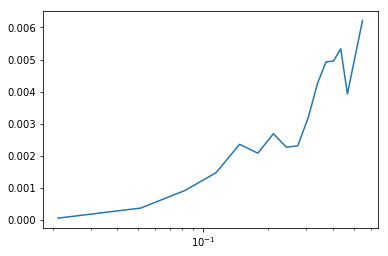

In [7]:
fig, ax = plt.subplots()
ax.plot(ips.freq_r, ips)
ax.set_xscale('log')